<a href="https://colab.research.google.com/github/svetlanama/goit-np-hw-01/blob/main/NP_HW_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завантаження даних і створення DataFrame

In [ ]:
# Імпорт потрібних бібліотек
import pandas as pd
from sklearn.datasets import load_iris

# Завантажуємо дані Iris
iris = load_iris()

# Створюємо DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Додаємо колонку з назвами класів
df['target'] = iris.target

# Перевіримо перші 5 рядків
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


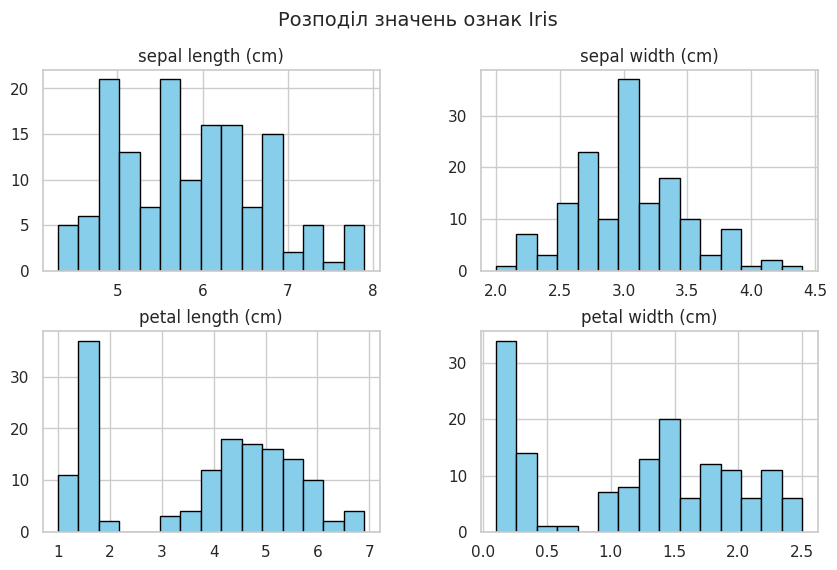

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

df_features = df[iris.feature_names]  # беремо лише числові ознаки

df_features.hist(figsize=(10, 6), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Розподіл значень ознак Iris", fontsize=14)
plt.show()


Отримання базових статистичних характеристик

In [ ]:
# Базові статистичні характеристики
stats = df.describe()
print(stats)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


Візуалізація розподілу спостережень за класами

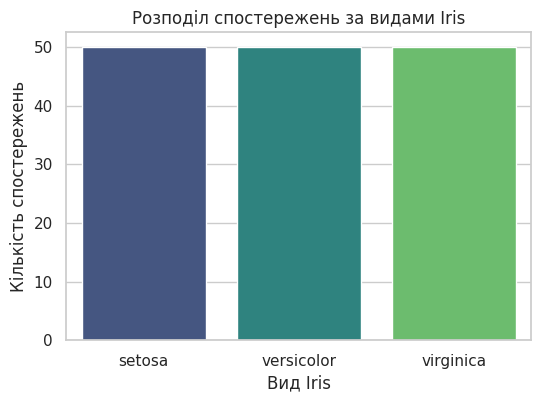

In [ ]:
# Створимо нову колонку з назвами видів
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

plt.figure(figsize=(6, 4))
sns.countplot(x='species', hue='species', data=df, palette='viridis', legend=False)

plt.title('Розподіл спостережень за видами Iris')
plt.xlabel('Вид Iris')
plt.ylabel('Кількість спостережень')

plt.show()



Стандартизація даних з sklearn.preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df[iris.feature_names]  # тільки ознаки

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)
print(df_scaled.head())



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


In [ ]:
from sklearn.decomposition import PCA

X = df[iris.feature_names].values
y_true = df['target'].values    # 0/1/2
species = df.get('species', df['target'].map({0:'setosa',1:'versicolor',2:'virginica'}))

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)


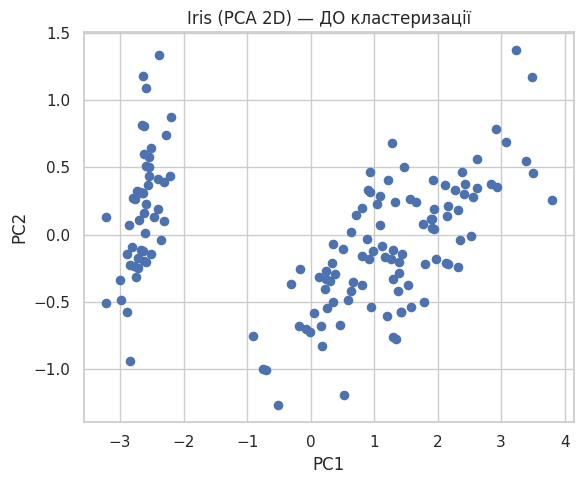

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=35)
plt.title('Iris (PCA 2D) — ДО кластеризації')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.tight_layout(); plt.show()


Спектральна кластеризація (Iris, 3 кластери)

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np
import pandas as pd

# Якщо вже є: df_scaled (стандартизовані ознаки) і df['target'] (істинні класи)
X = df_scaled[iris.feature_names].values  # матриця ознак
y_true = df['target'].values              # 0/1/2

# 1) Кластеризація
# affinity='rbf' добре працює для гладких кордонів; модна спробувати також 'nearest_neighbors'
clust = SpectralClustering(
    n_clusters=3,
    affinity='rbf',     # або 'nearest_neighbors'
    gamma=1.0,          # чутливість RBF (варто тюнити)
    assign_labels='kmeans',
    random_state=42,
)
y_pred = clust.fit_predict(X)

# 2) Якість кластеризації (не потребує відображення міток 1:1)
ari = adjusted_rand_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
print(f"ARI: {ari:.3f}")
print(f"NMI: {nmi:.3f}")

# 3) (Опціонально) Зіставити кластери з реальними класами для читабельної матриці плутанини
cm = confusion_matrix(y_true, y_pred)

# Мінімізуємо помилки перестановкою міток (угорський алгоритм)
row_ind, col_ind = linear_sum_assignment(cm.max() - cm)
label_map = {col: row for row, col in zip(row_ind, col_ind)}
y_pred_aligned = np.vectorize(label_map.get)(y_pred)
cm_aligned = confusion_matrix(y_true, y_pred_aligned)

print("Матриця плутанини (зіставлені мітки):")
print(pd.DataFrame(cm_aligned, index=['setosa','versicolor','virginica'],
                   columns=['setosa','versicolor','virginica']))


ARI: 0.645
NMI: 0.690
Матриця плутанини (зіставлені мітки):
            setosa  versicolor  virginica
setosa          50           0          0
versicolor       0          45          5
virginica        0          18         32


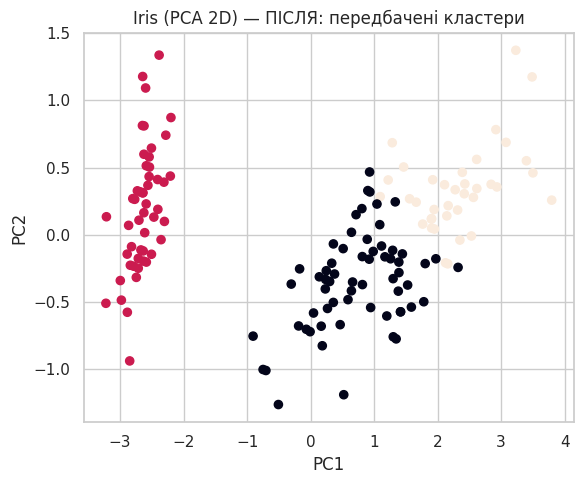

In [ ]:
plt.figure(figsize=(6,5))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, s=35)
plt.title('Iris (PCA 2D) — ПІСЛЯ: передбачені кластери')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.tight_layout(); plt.show()

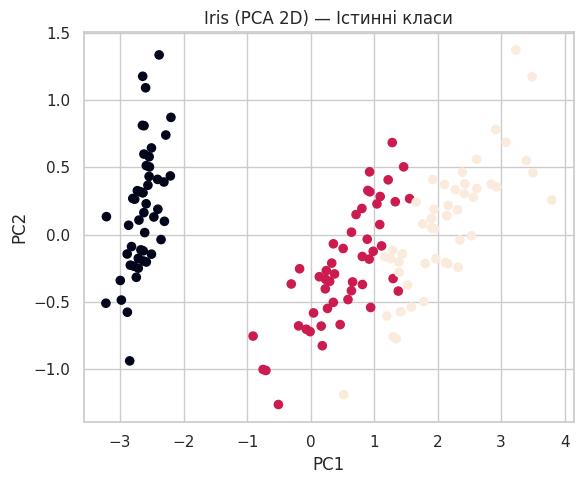

In [ ]:
plt.figure(figsize=(6,5))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_true, s=35)
plt.title('Iris (PCA 2D) — Істинні класи')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.tight_layout(); plt.show()

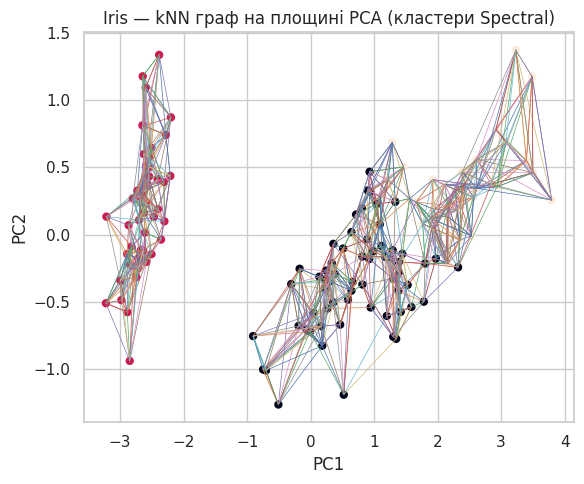

In [ ]:
from sklearn.neighbors import kneighbors_graph
import numpy as np

# Граф найближчих сусідів (к-ть)
A = kneighbors_graph(X, n_neighbors=10, mode='connectivity', include_self=False)
A = A.toarray()

plt.figure(figsize=(6,5))
# Спочатку ребра графу (тонкими лініями)
for i in range(A.shape[0]):
    nbrs = np.where(A[i] == 1)[0]
    for j in nbrs:
        plt.plot([X_pca[i,0], X_pca[j,0]], [X_pca[i,1], X_pca[j,1]], linewidth=0.5)

# Потім точки
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, s=25)
plt.title('Iris — kNN граф на площині PCA (кластери Spectral)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.tight_layout(); plt.show()


Порівняння кластерів із дійсними класами

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from scipy.optimize import linear_sum_assignment

# y_true — справжні класи
# y_pred — передбачені кластери зі SpectralClustering

# 1. Початкова матриця плутанини
cm = confusion_matrix(y_true, y_pred)
print("Початкова матриця плутанини:")
print(cm)

# 2. (Додатково) Вирівняємо мітки кластерів з реальними класами для зручності
# Використаємо алгоритм угорського призначення (мінімізація помилок)
row_ind, col_ind = linear_sum_assignment(cm.max() - cm)
label_map = {col: row for row, col in zip(row_ind, col_ind)}
y_pred_aligned = np.vectorize(label_map.get)(y_pred)

# 3. Нова матриця плутанини після вирівнювання
cm_aligned = confusion_matrix(y_true, y_pred_aligned)
print("\nМатриця плутанини після вирівнювання:")
print(pd.DataFrame(
    cm_aligned,
    index=['Setosa (true)', 'Versicolor (true)', 'Virginica (true)'],
    columns=['Setosa (pred)', 'Versicolor (pred)', 'Virginica (pred)']
))


Початкова матриця плутанини:
[[ 0 50  0]
 [45  0  5]
 [18  0 32]]

Матриця плутанини після вирівнювання:
                   Setosa (pred)  Versicolor (pred)  Virginica (pred)
Setosa (true)                 50                  0                 0
Versicolor (true)              0                 45                 5
Virginica (true)               0                 18                32


In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
print(f"\nARI (Adjusted Rand Index): {ari:.3f}")
print(f"NMI (Normalized Mutual Information): {nmi:.3f}")



ARI (Adjusted Rand Index): 0.645
NMI (Normalized Mutual Information): 0.690


Візуалізація кластерів у 2D (PCA)

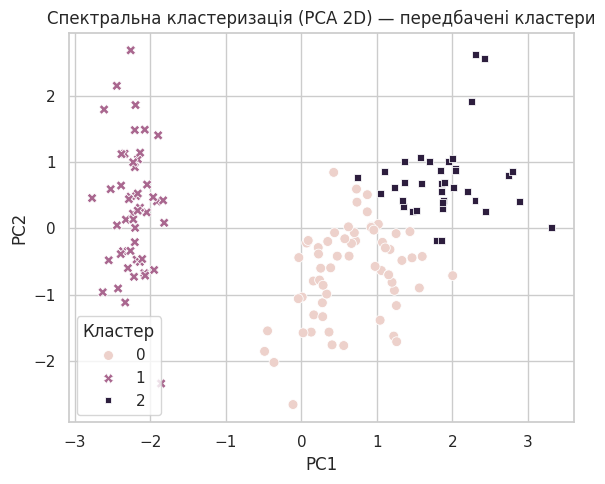

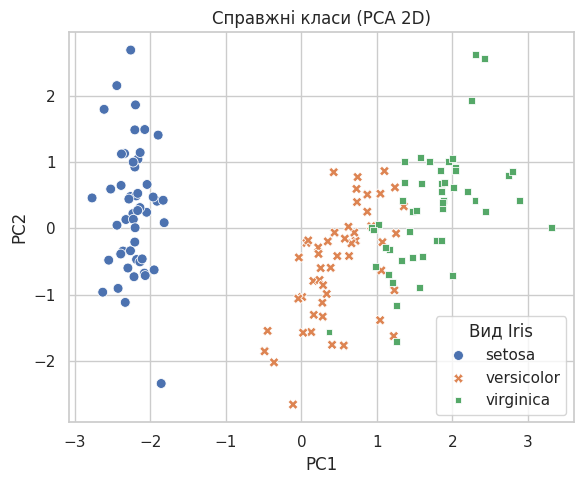

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Припускаємо, що у вас вже є:
# df_scaled  – стандартизовані ознаки
# y_true     – справжні класи (0/1/2)
# y_pred     – кластери зі SpectralClustering
# y_pred_aligned – кластери, вирівняні до класів (опційно, з попереднього кроку)

sns.set(style="whitegrid")

# 1) PCA до 2-х компонент
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_scaled[iris.feature_names])
df_vis = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_vis['true'] = y_true
df_vis['pred'] = y_pred
df_vis['pred_aligned'] = y_pred_aligned  # якщо раніше порахували
df_vis['species'] = df['species'] if 'species' in df.columns else df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})

# 2) Розсіювання за передбаченими кластерами
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df_vis, x='PC1', y='PC2',
    hue='pred', style='pred', s=50
)
plt.title('Спектральна кластеризація (PCA 2D) — передбачені кластери')
plt.legend(title='Кластер')
plt.tight_layout()
plt.show()

# 3) Розсіювання за справжніми класами
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df_vis, x='PC1', y='PC2',
    hue='species', style='species', s=50
)
plt.title('Справжні класи (PCA 2D)')
plt.legend(title='Вид Iris')
plt.tight_layout()
plt.show()


Висновок

In [ ]:
# 🧭 Висновки до роботи з набором даних *Iris*

---

## 1️⃣ Завантаження та підготовка даних
- Використано класичний набір даних **Iris** із бібліотеки `sklearn.datasets`.
- У наборі є **150 спостережень** із 4 числовими ознаками:
  - *sepal length (довжина чашолистка)*
  - *sepal width (ширина чашолистка)*
  - *petal length (довжина пелюстки)*
  - *petal width (ширина пелюстки)*
- Кожна квітка належить до одного з трьох видів:
  - *Iris setosa*
  - *Iris versicolor*
  - *Iris virginica*

---

## 2️⃣ Базові статистичні характеристики
- За допомогою `describe()` отримано середні, мінімальні, максимальні та квартильні значення ознак.
- Спостерігається, що **пелюстки** мають більшу варіацію, ніж **чашолистки**.
- Дані збалансовані: по **50 квіток** кожного виду.

---

## 3️⃣ Візуалізація розподілу класів
- Використано `seaborn.countplot()` для побудови графіка кількості спостережень кожного виду.
- За допомогою `pairplot()` візуалізовано пари ознак:
  - *Iris setosa* чітко відокремлена від інших.
  - *Versicolor* та *Virginica* частково перекриваються.

---

## 4️⃣ Стандартизація даних
- Використано `StandardScaler` із бібліотеки `sklearn.preprocessing`.
- Мета: привести всі ознаки до **одного масштабу** (mean = 0, std = 1),
  щоб жодна ознака не домінувала у розрахунках відстаней.
- Цей крок є важливим для алгоритмів, що використовують відстань (зокрема кластеризації та PCA).

---

## 5️⃣ Спектральна кластеризація
- Застосовано `SpectralClustering` із параметрами:
  ```python
  n_clusters=3, affinity='rbf', assign_labels='kmeans'



---

## 6️⃣ Порівняння з реальними класами

**Мета:** перевірити, наскільки отримані кластери збігаються з реальними видами ірисів.

- Для оцінки використано функцію `confusion_matrix()` із `sklearn.metrics`.
- Матриця плутанини показала:
  | Реальний клас | Setosa | Versicolor | Virginica |
  |:--------------|:-------:|:-----------:|:----------:|
  | **Setosa (true)** | 50 | 0 | 0 |
  | **Versicolor (true)** | 0 | 45 | 5 |
  | **Virginica (true)** | 0 | 18 | 32 |

- Висновок:
  - **Iris setosa** кластеризована ідеально ✅
  - **Versicolor** і **Virginica** частково змішані ⚠️

- Для кількісної оцінки точності застосовано метрики:
  ```python
  from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

  ari = adjusted_rand_score(y_true, y_pred)
  nmi = normalized_mutual_info_score(y_true, y_pred)

